## Extensions to Linear Regression

In [443]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import Lasso, Ridge
import pickle
from sklearn.metrics import mean_squared_error

In [444]:
data = pd.read_csv('Advertising.csv')
data = data.drop('Unnamed: 0',axis=1)
data.shape


(200, 4)

In [445]:
new_data = data
new_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [446]:
X = new_data.drop('Sales', axis=1)
y = new_data['Sales']

In [448]:
# split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y)

In [449]:
# use linear regression 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

In [452]:
 pickle.dump(linreg, open('lr_model.pkl', 'wb'))

In [455]:
# Pickle the model 
linreg1 = pickle.load(open('lr_model.pkl', 'rb'))

In [456]:
result = linreg1.score(X_test, y_test)
print(result)

0.9335214822503838


## 1. Write a Function to calculate train and test error for different polynomial degree (1-9)? 

In [440]:
def cal_degree(size):

    SIZE = size
    train_error = np.zeros(SIZE)
    test_error = np.zeros(SIZE)

    for i in range(1, SIZE + 1):
        poly = PolynomialFeatures(degree=i, interaction_only=False, include_bias=False)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)

        lr_poly = LinearRegression()
        lr_poly.fit(X_poly_train,y_train)

        cv_train = np.sqrt(mean_squared_error(y_train, lr_poly.predict(X_poly_train)))
        cv_test = np.sqrt(mean_squared_error(y_test, lr_poly.predict(X_poly_test)))

        train_error[i-1] = cv_train
        test_error[i-1]  = cv_test
    return train_error,test_error

In [507]:
error_train = cal_degree(10)[0].tolist()
error_test = cal_degree(10)[1].tolist()

## 2. How does increasing degree effects Bias Variance Trade ?

Text(0, 0.5, 'error')

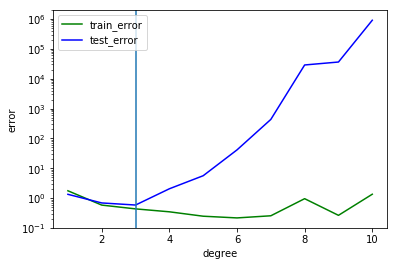

In [518]:
fig, ax = plt.subplots()
degree = list(range(1, 10 + 1))
              
# ax.plot(degree, error_train)
# ax.plot(degree, error_test)
plt.plot(degree, error_train, '-g', label='train_error')
plt.plot(degree, error_test, '-b', label='test_error')
plt.legend(loc='upper left')
ax.set_yscale('log')
ax.axvline(degree[np.argmin(error_test)])
plt.xlabel("degree")
plt.ylabel("error")

### 3. What method would you use to mitigate the overfitting problem? 

In [ ]:
## Your Answer ## 

## 4. What method would you use to mitigate the underfitting problem? 

In [511]:
## Your Answer ##

## 5. What is alpha in  Lesso Regulerization ?  Explain the graph 

In [325]:
from sklearn.metrics import mean_squared_error

In [512]:
SIZE = 100

error = np.zeros(SIZE)

for i, alpha in enumerate(np.linspace(0, 10, SIZE)):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_poly_train,y_train)
    y_pred = lasso.predict(X_poly_test)
    score = mean_squared_error(y_pred,y_test)
    error[i] = score
          

/Users/kjalodara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/Users/kjalodara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/kjalodara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kjalodara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conv

/Users/kjalodara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kjalodara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kjalodara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kjalodara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/kjalodara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kjalodara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kjalodara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kjalodara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

Text(0, 0.5, 'error')

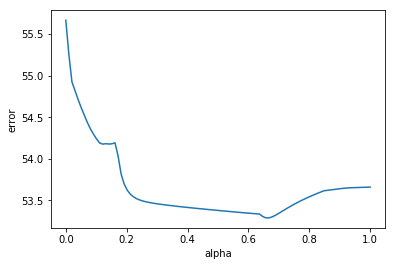

In [509]:
fig, ax = plt.subplots()

alphas = np.linspace(0, 1, SIZE)

ax.plot(alphas, error)
plt.xlabel("alpha")
plt.ylabel("error")